logreg


In [ ]:
import numpy as np

class LogisticRegression:
    def __init__(self, alpha, regLambda, epsilon, maxNumIters):
        self.alpha = alpha
        self.regLambda = regLambda
        self.epsilon = epsilon
        self.maxNumIters = maxNumIters
        self.theta = None

    def fit(self, X, y):
        n, d = X.shape
        X = np.c_[np.ones((n, 1)), X]  # Augment X with a column of ones for θ0

        self.theta = np.random.randn(d + 1)  # Random initialization

        for _ in range(self.maxNumIters):
            old_theta = self.theta.copy()
            cost_gradient = self.computeGradient(self.theta, X, y, self.regLambda)
            self.theta -= self.alpha * np.mean(cost_gradient, axis=1)


            if np.linalg.norm(self.theta - old_theta, 2) <= self.epsilon:
                break

    def predict(self, X):
        n, _ = X.shape
        X = np.c_[np.ones((n, 1)), X]  # Augment X with a column of ones for θ0
        predictions = self.sigmoid(X.dot(self.theta))
        return (predictions >= 0.5).astype(int)

    def computeCost(self, theta, X, y, regLambda):
        h = self.sigmoid(X.dot(theta))
        cost = -np.mean(y * np.log(h) + (1 - y) * np.log(1 - h)) + regLambda / 2 * np.sum(theta[1:]**2)
        return cost

    def computeGradient(self, theta, X, y, regLambda):
        m = len(y)
        h = self.sigmoid(np.dot(X, theta))
        error = h - y
        gradient = X.T.dot(error) / m

        # Exclude regularization for the bias term (theta0)
        regularization_term = (regLambda / m) * theta
        regularization_term[0] = 0

        gradient += regularization_term[:, np.newaxis]
        return gradient

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))


test_logreg1

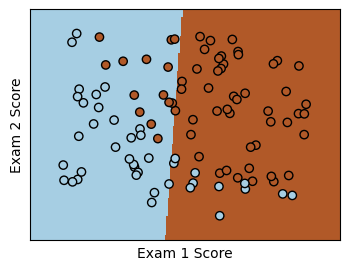

In [ ]:
# Test script for training a logistic regressiom model
#
# Author: Eric Eaton
#
# This file should run successfully without changes if your implementation is correct
#
from numpy import loadtxt, ones, zeros, where
import numpy as np
from pylab import plot,legend,show,where,scatter,xlabel, ylabel,linspace,contour,title
import matplotlib.pyplot as plt


if __name__ == "__main__":
    # Load Data
    filename = '/content/data1.dat'
    data = loadtxt(filename, delimiter=',')
    X = data[:, 0:2]
    y = np.array([data[:, 2]]).T
    n,d = X.shape

    # Standardize the data
    mean = X.mean(axis=0)
    std = X.std(axis=0)
    X = (X - mean) / std

    # train logistic regression
    logregModel = LogisticRegression(alpha=0.01, regLambda=0.00000001, epsilon=0.0001, maxNumIters=1000)
    logregModel.fit(X,y)

    # Plot the decision boundary
    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = logregModel.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(1, figsize=(4, 3))
    plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

    # Plot the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)

    # Configure the plot display
    plt.xlabel('Exam 1 Score')
    plt.ylabel('Exam 2 Score')

    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())

    plt.show()
